In [1]:
__author__ = "me"
__date__ = "2015_10_13"
%pylab inline
import pandas as pd
import numpy as np
import geopandas as gp
import datetime
import pylab as plt
import os

import requests
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


/Users/casy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
cols = ['genCategory','category','name','lon','lat','checkIns','tips','users','createdAt','tileID','ID','query','time','verified','price','rating','tags','photoCount','description']

tokyo_path = "/Users/casy/Dropbox/CUSP/project/Square_cities/data/Tokyo_all.csv"
singapor_path = '/Users/casy/Dropbox/CUSP/project/Square_cities/data/Singapur_all.csv'
moscow_path = '/Users/casy/Dropbox/CUSP/project/Square_cities/data/Mosco_all.csv'

tokyo = pd.read_csv(tokyo_path, index_col=0, encoding='utf8')[cols]
singapor = pd.read_csv(singapor_path, index_col=0, encoding='utf8')[cols]
moscow = pd.read_csv(moscow_path, index_col=0, encoding='utf8')[cols]

In [3]:
tokyo.tail(2)

,genCategory,category,name,lon,lat,checkIns,tips,users,createdAt,tileID,ID,query,time,verified,price,rating,tags,photoCount,description
132381,Food,Chinese Restaurant,幸楽,139.721080,35.782925,4,0,4,2012.08.16,0_10_00_00_00_01_01,502c670be4b0eed9c22891db,A_Tokyo_c3,2015.11.12 19:59:21,False,-1,-1,NaN,2,NaN
132382,Food,Café,Earth Color,139.721817,35.782852,0,0,0,2015.11.10,0_10_00_00_00_01_01,56417dd1498eaa25bb14c633,A_Tokyo_c3,2015.11.12 19:59:22,False,-1,-1,NaN,1,NaN


In [4]:
def convertDT(df):
    df['createdAt'] = pd.to_datetime(df['createdAt'], yearfirst=1)
    return df


In [5]:
tokyo = convertDT(tokyo)

In [6]:
singapor = convertDT(singapor)

In [7]:
moscow = convertDT(moscow)

In [8]:
def plotCumTS(df, ax, name):
    x = df[['createdAt','ID']].set_index('createdAt').resample('1M', how='count').cumsum().rename(columns={'ID':name})
    x = x/x.max()
    x.plot( ax=ax)

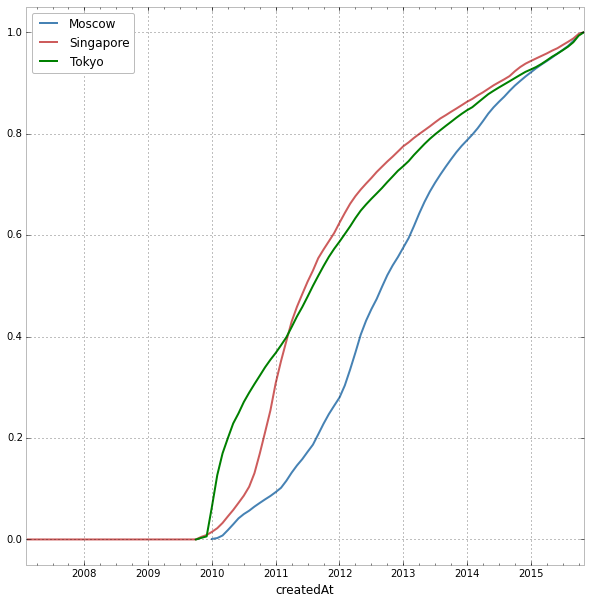

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, df in {'Tokyo':tokyo, 'Singapore':singapor, 'Moscow':moscow}.iteritems():
    plotCumTS(df,ax, name)

In [10]:
gl = list(set(tokyo.genCategory.tolist()))
gl

[nan,
 u'College & University',
 u'Food',
 u'Residence',
 u'Travel & Transport',
 u'Shop & Service',
 u'Arts & Entertainment',
 u'Nightlife Spot',
 u'Outdoors & Recreation',
 u'Professional & Other Places',
 u'Event']

In [26]:
def catCumTS(df,name):
    df2 = df[['genCategory','createdAt']].set_index('createdAt')

    for cat in gl:
        df2[cat]= df2['genCategory'].apply(lambda x: int(x==cat))
    
    df2 = df2[gl]
    df2 = df2.resample('1M', how='sum').cumsum()
    df2 = df2.cumsum(axis=1)
    
    ## just to have same top-down sequense in legend
    cols = df2.columns.tolist() 
    cols.reverse()

    df2 = df2[cols]

    return df2.plot(figsize=(10,10),title='Timeline of venue creation, %s' % name)

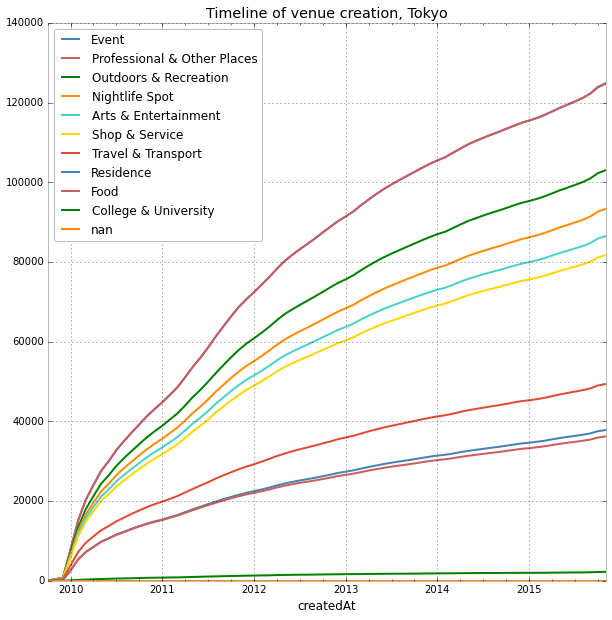

In [27]:
p = catCumTS(tokyo, 'Tokyo')

(477.0, 550.0)

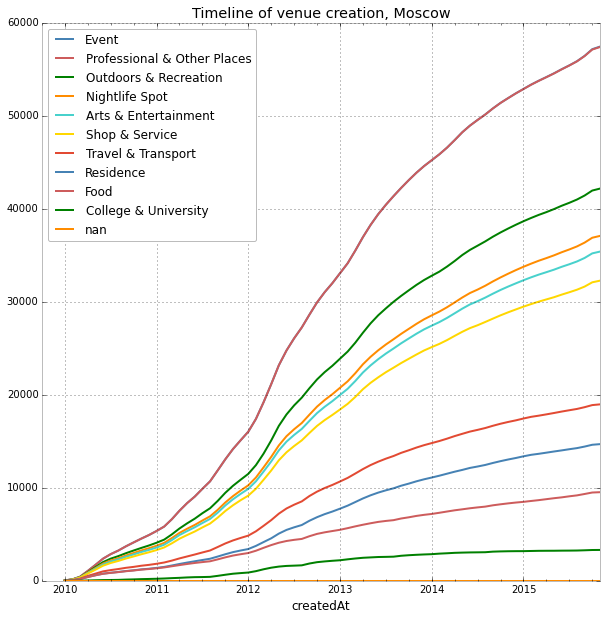

In [28]:
catCumTS(moscow, 'Moscow')
plt.xlim(p.get_xlim()) 

(477.0, 550.0)

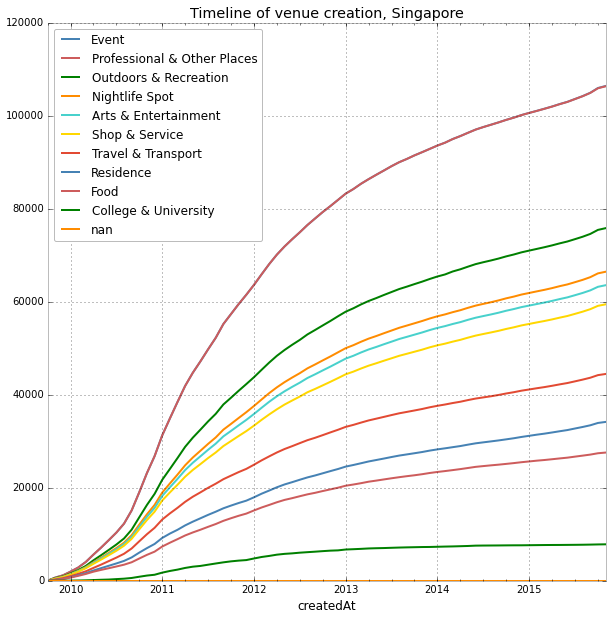

In [29]:
catCumTS(singapor, 'Singapore')
plt.xlim(p.get_xlim()) 